<a href="https://colab.research.google.com/github/Doclikam/machine-learning-I/blob/main/bostonhouseproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the relevant libraries**



> Add blockquote



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Import data**

In [ ]:
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')

In [ ]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
train_data.shape

(1460, 81)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# **Working with missing values**

In [ ]:
mis_val=train_data.isnull().sum().sort_values(ascending=False)

In [ ]:
mis_percent=100*train_data.isnull().sum().sort_values(ascending=False)/len(train_data)

In [ ]:
mis_val_table=pd.concat([mis_val, mis_percent], axis=1, keys=['mis_val',' mis_percent'], sort=False)

In [ ]:
mis_val_table=mis_val_table[mis_val>0]

In [ ]:
mis_val_table.index.name='categories'

In [ ]:
mis_val_table.shape

(19, 2)

In [ ]:
categorical_cols=train_data.select_dtypes(include='object')
categorical_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
missing_vals=[x for x in mis_val_table.index if x in categorical_cols.columns]

In [ ]:
missing_vals

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'Electrical']

In [ ]:
new_mis_val_table=mis_val_table.reset_index()
new_mis_val_table.shape

(19, 3)

In [ ]:
missing_categories=new_mis_val_table[new_mis_val_table['categories'].isin(categorical_cols.columns)]

In [ ]:
missing_categories.columns

Index(['categories', 'mis_val', ' mis_percent'], dtype='object')

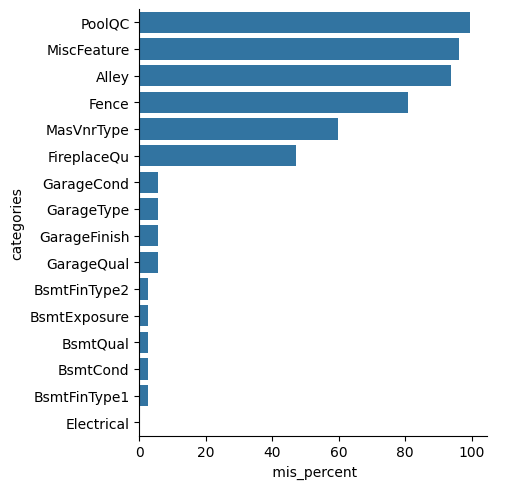

In [ ]:
sns.catplot(data=missing_categories, x=' mis_percent',y='categories', kind='bar' )
plt.show()

## **Numerical values**

In [ ]:
numerical_cols=train_data.select_dtypes(include='number')

In [ ]:
numerical_cols.shape

(1460, 38)

In [ ]:
missing_n_vals=[x for x in mis_val_table.index if x in numerical_cols.columns]

In [ ]:
missing_nums=new_mis_val_table[new_mis_val_table['categories'].isin(numerical_cols.columns)]

In [ ]:
missing_nums

,categories,mis_val,mis_percent
6,LotFrontage,259,17.739726
7,GarageYrBlt,81,5.547945
17,MasVnrArea,8,0.547945


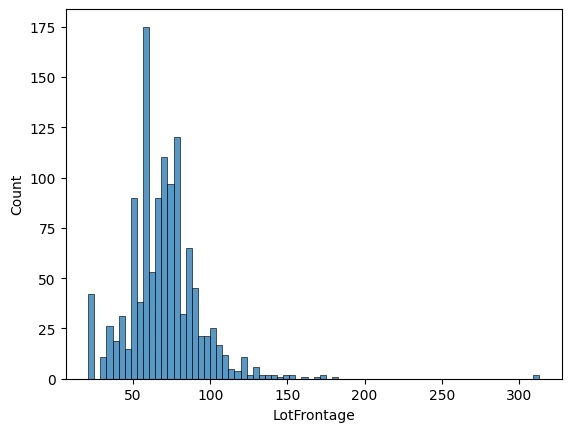

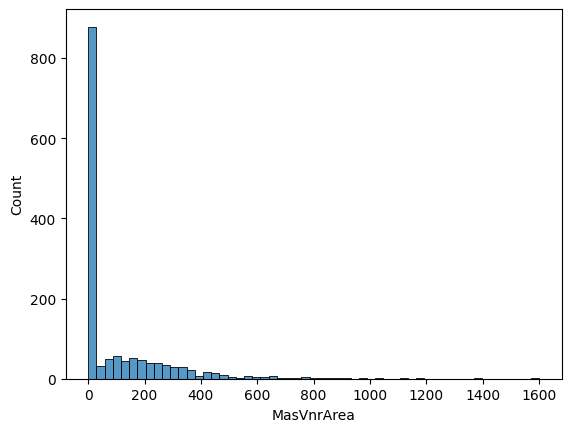

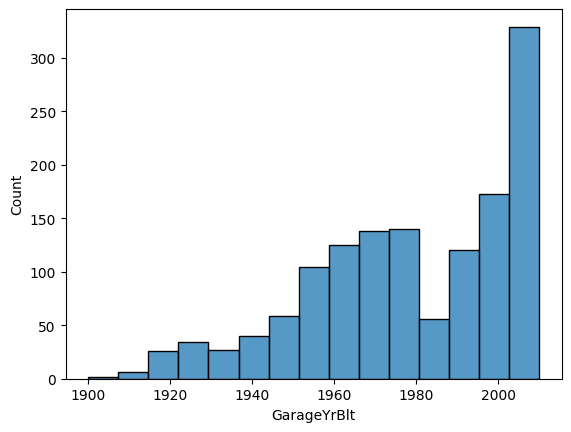

In [ ]:
for i in train_data.columns:
    if i in missing_n_vals:
      sns.histplot(x=i, data=train_data)
      plt.show()


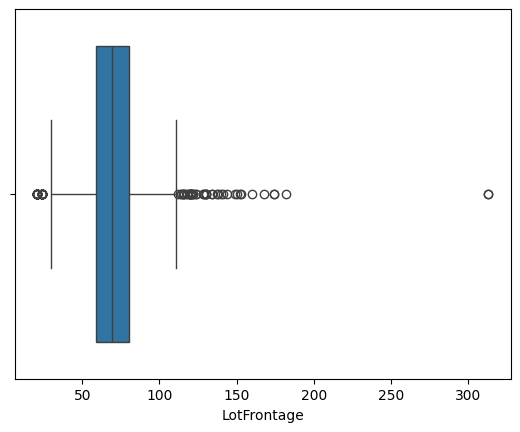

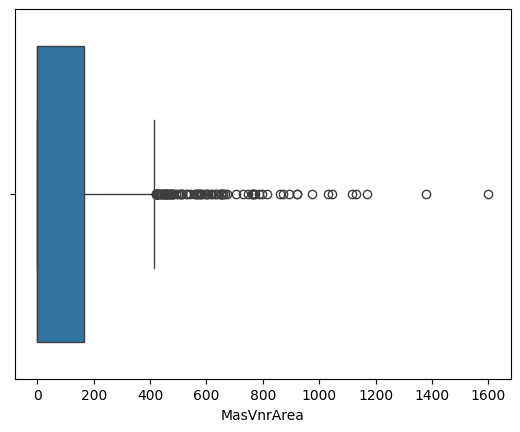

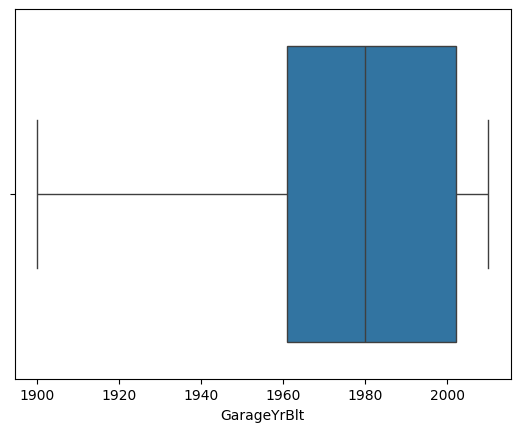

In [ ]:
for i in train_data.columns:
    if i in missing_n_vals:
      sns.boxplot(x=i, data=train_data)
      plt.show()


# **filling the missing values**

# categorical columns

In [ ]:
for x in ['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'Electrical']:
    train_data[x]=train_data[x].fillna('None')

## **Numerical columns** **

In [ ]:
train_data["LotFrontage"] = train_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [ ]:
train_data.fillna(train_data['MasVnrArea'].median(), inplace=True)
train_data.fillna(train_data['GarageYrBlt'].mean(), inplace=True)

# **Finding duplicate records**

In [ ]:
train_data.duplicates

0

In [ ]:
continous_vars=[i for i in train_data.columns if 'Yr' in i or  'Year' in i]

In [ ]:
continous_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
discrete_val=[i for i in numerical_cols.columns if len(train_data[i].unique())<25]
continous_nums=[i for i in numerical_cols.columns if i not in continous_vars+["id"] and i not in discrete_val]

In [ ]:
corr_df=train_data[continous_nums].corr()

In [ ]:
corr_df

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
Id,1.000000,-0.003381,-0.033226,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,0.008273,0.017634,-0.029643,-0.000477,0.002889,0.001330,-0.021917
LotFrontage,-0.003381,1.000000,0.335957,0.195830,0.232576,0.052237,0.119174,0.381038,0.434109,0.075686,0.385190,0.339085,0.088736,0.141734,0.008057,0.041063,0.349876
LotArea,-0.033226,0.335957,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843
MasVnrArea,-0.051071,0.195830,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.370884,0.159991,0.122528,-0.109907,0.062248,0.472614
BsmtFinSF1,-0.005024,0.232576,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420
BsmtFinSF2,-0.005968,0.052237,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.011378
BsmtUnfSF,-0.007940,0.119174,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479
TotalBsmtSF,-0.015415,0.381038,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stFlrSF,0.010496,0.434109,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852
2ndFlrSF,0.005590,0.075686,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.687501,0.138347,0.092165,0.208026,0.061989,0.040606,0.319334


In [ ]:

corr_df.nlargest(5,'SalePrice')

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
SalePrice,-0.021917,0.349876,0.263843,0.472614,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,0.708624,0.623431,0.324413,0.315856,-0.128578,0.111447,1.000000
GrLivArea,0.008273,0.385190,0.263116,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.468997,0.247433,0.330224,0.009113,0.101510,0.708624
GarageArea,0.017634,0.339085,0.180403,0.370884,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,0.468997,1.000000,0.224666,0.241435,-0.121777,0.051412,0.623431
TotalBsmtSF,-0.015415,0.381038,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stFlrSF,0.010496,0.434109,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852


<Axes: >

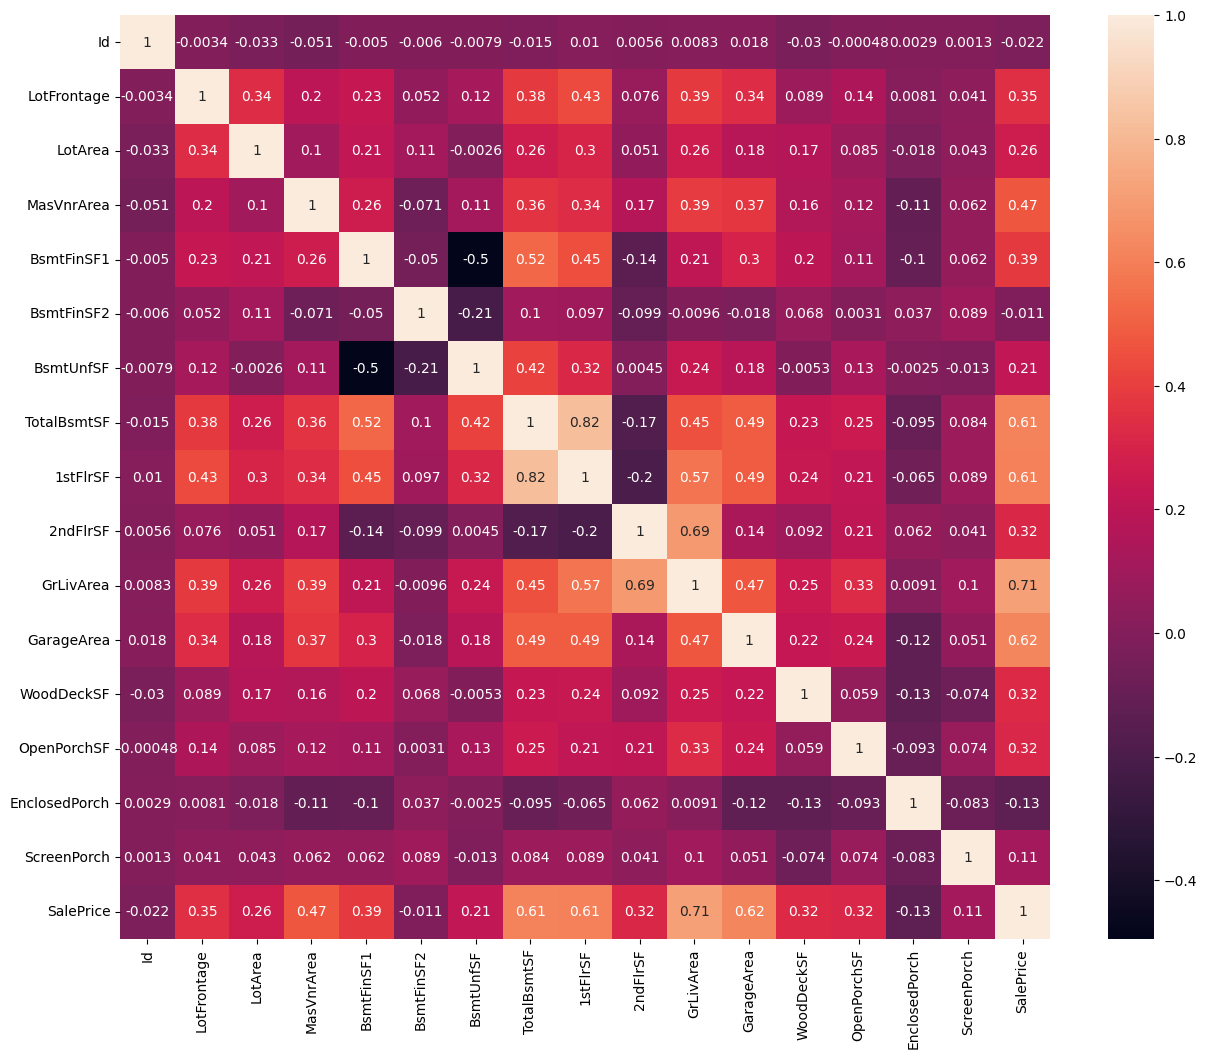

In [ ]:
fig,ax=plt.subplots(figsize=(15,12))
sns.heatmap(corr_df,annot=True)
plt.show()